In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.metrics import roc_curve, roc_auc_score, auc
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_csv('Healthcare_Insurance.csv')

In [4]:
df.head(100)

,RID,Sum Insured,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,Label
0,3zhptpup,"2,00,000",60.0,male,64,24.3,NoDisease,1,0,Mumbay,72,0,0,Actor,13112.6,0
1,z0sfqbfr,"4,00,000",49.0,female,75,22.6,NoDisease,1,0,Bangalore,78,1,1,Engineer,9567.0,0
2,yi2l5bcu,"2,00,000",32.0,female,64,17.8,Epilepsy,2,1,Hydrabad,88,1,1,Academician,32734.2,0
3,y78y6b25,"4,00,000",61.0,female,53,36.4,NoDisease,1,1,Chennai,72,1,0,Chef,48517.6,1
4,vwthwjlm,"4,00,000",19.0,female,50,20.6,NoDisease,0,0,Kovai,82,1,0,HomeMakers,1731.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,b3ciolsp,"4,00,000",46.0,female,65,27.7,NoDisease,1,0,Stamford,84,1,1,Farmer,8232.6,0
96,dbxp7dlt,"2,00,000",44.0,male,64,31.4,Alzheimer,1,1,Worcester,80,1,0,CEO,39556.5,0
97,jme8gszw,"5,00,000",46.0,male,91,25.7,NoDisease,3,0,Atlanta,60,0,0,FilmDirector,9301.9,1
98,zltp8ei4,"5,00,000",26.0,male,83,46.5,NoDisease,1,0,Brimingham,80,1,0,FilmDirector,2927.1,1


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RID                  14999 non-null  object 
 1   Sum Insured          15000 non-null  object 
 2   age                  14604 non-null  float64
 3   sex                  15000 non-null  object 
 4   weight               15000 non-null  int64  
 5   bmi                  14044 non-null  float64
 6   hereditary_diseases  15000 non-null  object 
 7   no_of_dependents     15000 non-null  int64  
 8   smoker               15000 non-null  int64  
 9   city                 15000 non-null  object 
 10  bloodpressure        15000 non-null  int64  
 11  diabetes             15000 non-null  int64  
 12  regular_ex           15000 non-null  int64  
 13  job_title            15000 non-null  object 
 14  claim                15000 non-null  float64
 15  Label                15000 non-null 

In [6]:
# Feature engineering
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 45, 60, 120], labels=['0-18', '19-30', '31-45', '46-60', '61+'])
df['bmi_category'] = pd.cut(df['bmi'], bins=[-1, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
df['bp_category'] = pd.cut(df['bloodpressure'], bins=[-1, 120, 139, 159, 1000], labels=['Normal', 'Pre-Hypertension', 'Stage 1', 'Stage 2'])
df['dependents_group'] = pd.cut(df['no_of_dependents'], bins=[-1, 0, 2, 100], labels=['No dependents', '1-2 dependents', '3+ dependents'])

In [7]:
df.head(100)

,RID,Sum Insured,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,Label,age_group,bmi_category,bp_category,dependents_group
0,3zhptpup,"2,00,000",60.0,male,64,24.3,NoDisease,1,0,Mumbay,72,0,0,Actor,13112.6,0,46-60,Normal,Normal,1-2 dependents
1,z0sfqbfr,"4,00,000",49.0,female,75,22.6,NoDisease,1,0,Bangalore,78,1,1,Engineer,9567.0,0,46-60,Normal,Normal,1-2 dependents
2,yi2l5bcu,"2,00,000",32.0,female,64,17.8,Epilepsy,2,1,Hydrabad,88,1,1,Academician,32734.2,0,31-45,Underweight,Normal,1-2 dependents
3,y78y6b25,"4,00,000",61.0,female,53,36.4,NoDisease,1,1,Chennai,72,1,0,Chef,48517.6,1,61+,Obese,Normal,1-2 dependents
4,vwthwjlm,"4,00,000",19.0,female,50,20.6,NoDisease,0,0,Kovai,82,1,0,HomeMakers,1731.7,0,19-30,Normal,Normal,No dependents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,b3ciolsp,"4,00,000",46.0,female,65,27.7,NoDisease,1,0,Stamford,84,1,1,Farmer,8232.6,0,46-60,Overweight,Normal,1-2 dependents
96,dbxp7dlt,"2,00,000",44.0,male,64,31.4,Alzheimer,1,1,Worcester,80,1,0,CEO,39556.5,0,31-45,Obese,Normal,1-2 dependents
97,jme8gszw,"5,00,000",46.0,male,91,25.7,NoDisease,3,0,Atlanta,60,0,0,FilmDirector,9301.9,1,46-60,Overweight,Normal,3+ dependents
98,zltp8ei4,"5,00,000",26.0,male,83,46.5,NoDisease,1,0,Brimingham,80,1,0,FilmDirector,2927.1,1,19-30,Obese,Normal,1-2 dependents


In [8]:
df.fillna(df.mean(), inplace=True)


C:\Users\nazari\AppData\Local\Temp\ipykernel_23468\1920348818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


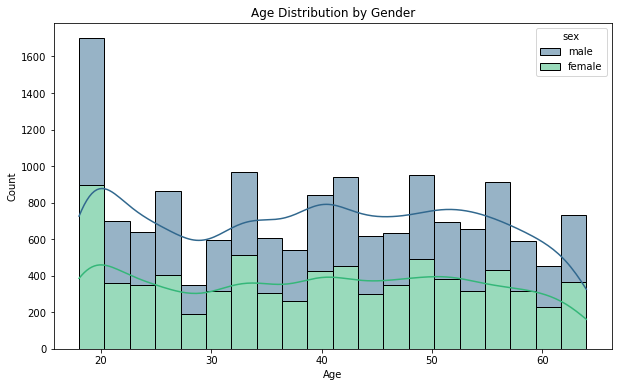

In [9]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=20, hue='sex', multiple='stack', palette='viridis')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

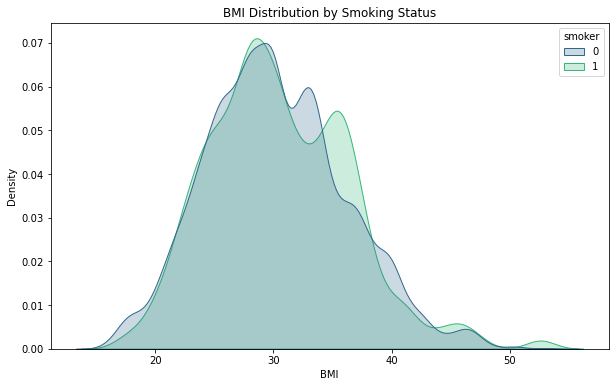

In [10]:
# BMI distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='bmi', hue='smoker', fill=True, common_norm=False, palette='viridis')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

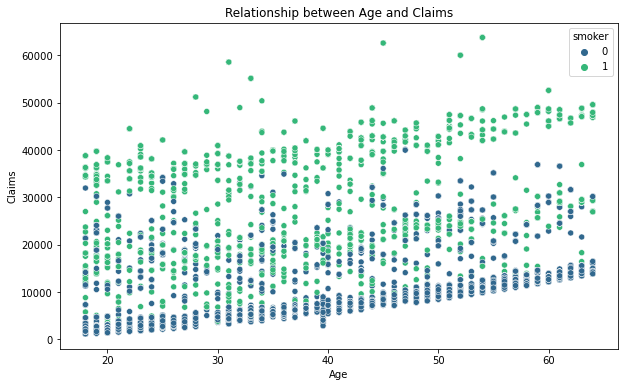

In [11]:
# Relationship between age and claims
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='claim', hue='smoker', palette='viridis')
plt.title('Relationship between Age and Claims')
plt.xlabel('Age')
plt.ylabel('Claims')
plt.show()

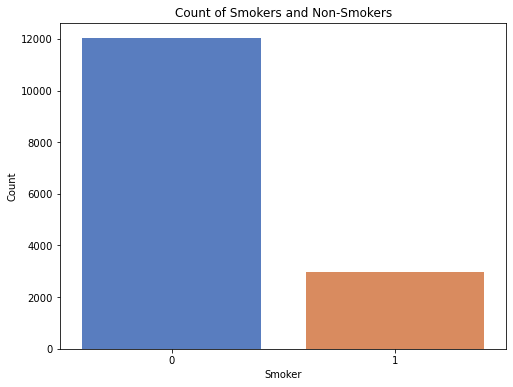

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoker', palette='muted')
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

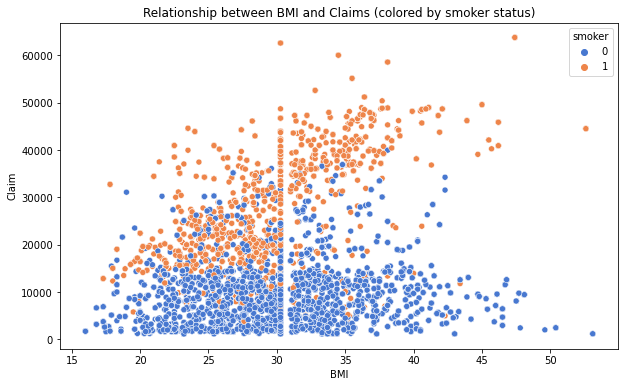

In [13]:
# Relationship between BMI and claims colored by smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='claim', hue='smoker', palette='muted')
plt.title('Relationship between BMI and Claims (colored by smoker status)')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.show()

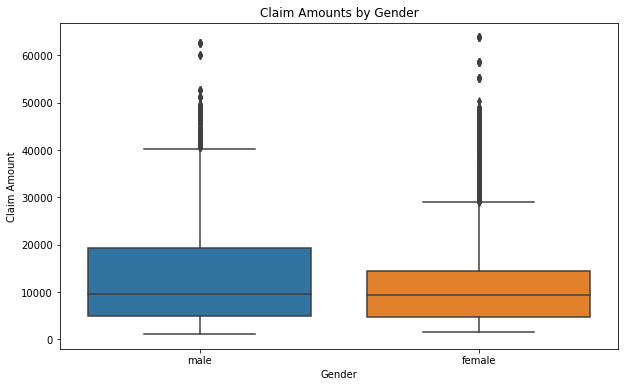

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='claim', data=df)
plt.title('Claim Amounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim Amount')
plt.show()

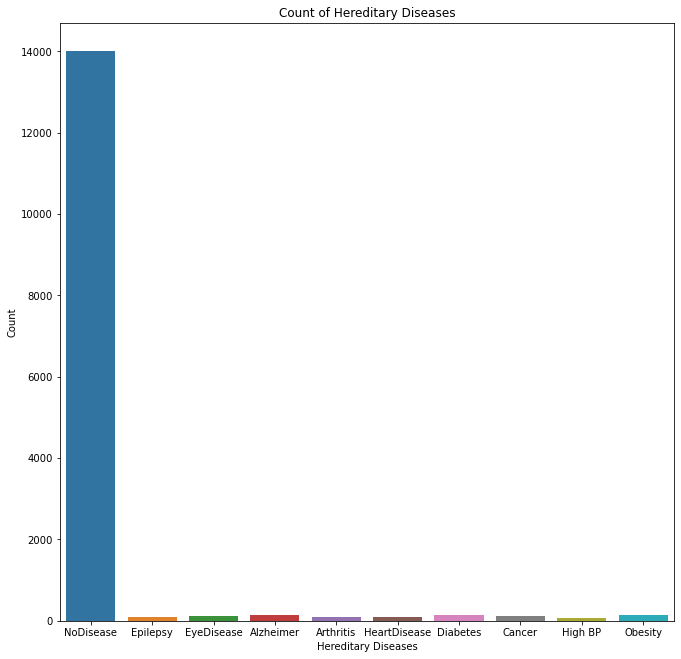

In [15]:
plt.figure(figsize=(11, 11))
sns.countplot(x='hereditary_diseases', data=df)
plt.title('Count of Hereditary Diseases')
plt.xlabel('Hereditary Diseases')
plt.ylabel('Count')
plt.show()

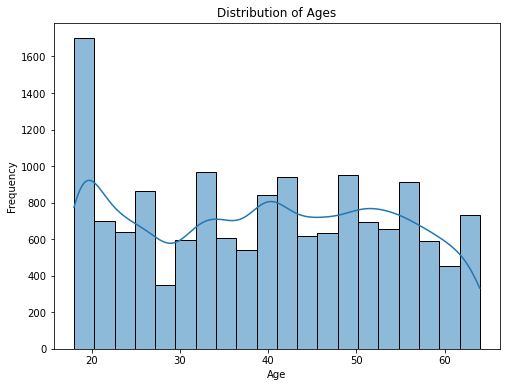

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

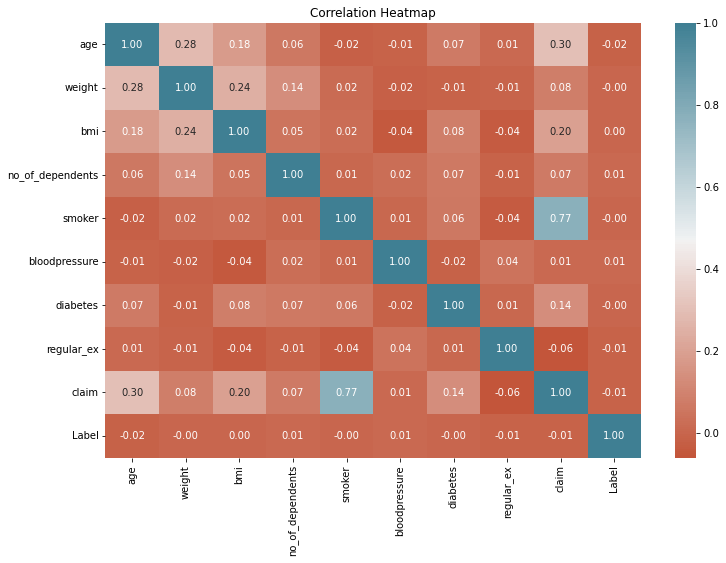

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap=sns.diverging_palette(20, 220, n=200), fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

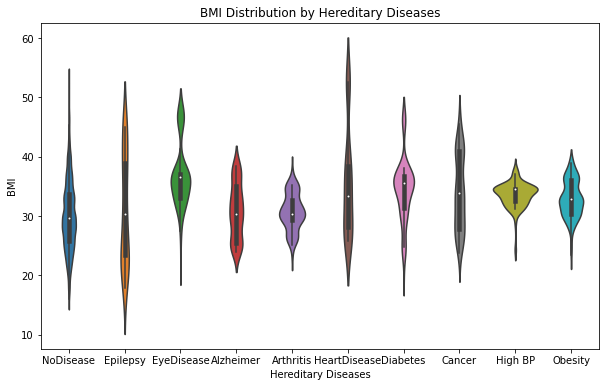

In [18]:
#Violinplot of BMI by Hereditary Diseases
plt.figure(figsize=(10, 6))
sns.violinplot(x='hereditary_diseases', y='bmi', data=df)
plt.title('BMI Distribution by Hereditary Diseases')
plt.xlabel('Hereditary Diseases')
plt.ylabel('BMI')
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [20]:
df['Sum Insured'] = df['Sum Insured'].str.replace(',', '').astype(float)


In [21]:
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['hereditary_diseases'] = label_encoder.fit_transform(df['hereditary_diseases'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['city'] = label_encoder.fit_transform(df['city'])
df['job_title'] = label_encoder.fit_transform(df['job_title'])
df['age_group'] = label_encoder.fit_transform(df['job_title'])
df['bmi_category'] = label_encoder.fit_transform(df['bmi_category'])
df['bp_category'] = label_encoder.fit_transform(df['bp_category'])
df['dependents_group'] = label_encoder.fit_transform(df['dependents_group'])

In [22]:
df.fillna(df.mean(), inplace=True)

C:\Users\nazari\AppData\Local\Temp\ipykernel_23468\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [23]:
X = df.drop(['RID', 'bmi','age', 'Sum Insured','job_title','city','Label'], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.56
Confusion Matrix:
[[2509    0]
 [1991    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      2509
           1       0.00      0.00      0.00      1991

    accuracy                           0.56      4500
   macro avg       0.28      0.50      0.36      4500
weighted avg       0.31      0.56      0.40      4500



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.52
Confusion Matrix:
[[1619  890]
 [1258  733]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.65      0.60      2509
           1       0.45      0.37      0.41      1991

    accuracy                           0.52      4500
   macro avg       0.51      0.51      0.50      4500
weighted avg       0.51      0.52      0.51      4500



In [26]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.56
Confusion Matrix:
[[2475   34]
 [1953   38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.99      0.71      2509
           1       0.53      0.02      0.04      1991

    accuracy                           0.56      4500
   macro avg       0.54      0.50      0.38      4500
weighted avg       0.55      0.56      0.41      4500



In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check class distribution before oversampling
print("Before SMOTE:", Counter(y_train))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({0: 5913, 1: 4587})
After SMOTE: Counter({1: 5913, 0: 5913})


In [28]:
# Now, train your model using the resampled data
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.49
Confusion Matrix:
[[1075 1434]
 [ 847 1144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.43      0.49      2509
           1       0.44      0.57      0.50      1991

    accuracy                           0.49      4500
   macro avg       0.50      0.50      0.49      4500
weighted avg       0.51      0.49      0.49      4500



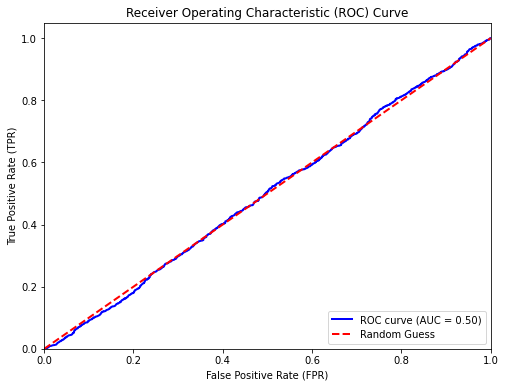

In [29]:
# Get predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Vary the threshold and calculate true positive rate (TPR) and false positive rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [30]:
# Calculate AUC
auc_score = auc(fpr, tpr)
print(f"AUC: {auc_score:.2f}")

# Find the threshold closest to a custom value
custom_threshold = 0.50  # Change this to your desired custom threshold
closest_threshold_idx = (np.abs(thresholds - custom_threshold)).argmin()
closest_threshold = thresholds[closest_threshold_idx]

print(f"Closest Threshold to {custom_threshold}: {closest_threshold}")

# Calculate predictions using the custom threshold
y_pred_custom = (y_prob >= closest_threshold).astype(int)

# Evaluate the model with the custom threshold
accuracy_custom = accuracy_score(y_test, y_pred_custom)
conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
classification_rep_custom = classification_report(y_test, y_pred_custom)
print(f"\nAccuracy with Custom Threshold: {accuracy_custom:.2f}")
print("Confusion Matrix with Custom Threshold:")
print(conf_matrix_custom)
print("Classification Report with Custom Threshold:")
print(classification_rep_custom)

AUC: 0.50
Closest Threshold to 0.5: 0.5000258316839653

Accuracy with Custom Threshold: 0.49
Confusion Matrix with Custom Threshold:
[[1075 1434]
 [ 847 1144]]
Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           0       0.56      0.43      0.49      2509
           1       0.44      0.57      0.50      1991

    accuracy                           0.49      4500
   macro avg       0.50      0.50      0.49      4500
weighted avg       0.51      0.49      0.49      4500



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using Random Forest classifier
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.2f}")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("Classification Report:")
print(classification_rep_rf)


Random Forest Classifier:
Accuracy: 0.51
Confusion Matrix:
[[1417 1092]
 [1130  861]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.56      0.56      2509
           1       0.44      0.43      0.44      1991

    accuracy                           0.51      4500
   macro avg       0.50      0.50      0.50      4500
weighted avg       0.51      0.51      0.51      4500



In [32]:
from sklearn.naive_bayes import GaussianNB

# Train Gaussian Naive Bayes classifier
nb_model = GaussianNB()
nb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set using Gaussian Naive Bayes classifier
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Gaussian Naive Bayes model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

print("\nGaussian Naive Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_nb)
print("Classification Report:")
print(classification_rep_nb)



Gaussian Naive Bayes Classifier:
Accuracy: 0.47
Confusion Matrix:
[[ 555 1954]
 [ 450 1541]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.22      0.32      2509
           1       0.44      0.77      0.56      1991

    accuracy                           0.47      4500
   macro avg       0.50      0.50      0.44      4500
weighted avg       0.50      0.47      0.42      4500



In [33]:
X = df.drop(['RID', 'claim', 'Label'], axis=1)  # Dropping 'RID', 'claim', and 'Label' columns
y = df['claim']
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import GradientBoostingRegressor  



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the training set to demonstrate
predictions_train = lr.predict(X_train)
predictions_test = lr.predict(X_test)


In [46]:
X.columns

Index(['Sum Insured', 'age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'age_group', 'bmi_category', 'bp_category',
       'dependents_group'],
      dtype='object')

In [34]:
new_df = pd.DataFrame(X_train,index=[0])
new_df

,Sum Insured,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,age_group,bmi_category,bp_category,dependents_group
0,200000.0,60.0,1,64,24.3,8,1,0,62,72,0,0,2,2,0,0,0


In [35]:
new_pred = lr.predict(new_df)
print("Medical Insurance cost for New Customer is:", new_pred[0])


Medical Insurance cost for New Customer is: 11534.344540881768


In [36]:
svr = SVR()
svr.fit(X_train, y_train)

# Make predictions on the training set to demonstrate
predictions_train = svr.predict(X_train)
predictions_test = svr.predict(X_test)

In [37]:
new_pred = svr.predict(new_df)
print("Medical Insurance cost for New Customer is:", new_pred[0])


Medical Insurance cost for New Customer is: 9504.090504631107


In [38]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

predictions_train_rf = rf.predict(X_train)
predictions_test_rf = rf.predict(X_test)

In [39]:
new_pred = rf.predict(new_df)
print("Medical Insurance cost for New Customer is:", new_pred[0])


Medical Insurance cost for New Customer is: 13112.600000000008


In [40]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

predictions_train_gbr = gbr.predict(X_train)
predictions_test_gbr = gbr.predict(X_test)


In [41]:
new_pred = gbr.predict(new_df)
print("Medical Insurance cost for New Customer is:", new_pred[0])


Medical Insurance cost for New Customer is: 15644.02588501726


In [42]:

svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)
# Make predictions using the Linear Regression (LR) model on the test data
y_pred1 = lr.predict(X_test)

# Make predictions using the Support Vector Regression (SVR) model on the test data
y_pred2 = svm.predict(X_test)

# Make predictions using the Random Forest Regressor (RF) model on the test data
y_pred3 = rf.predict(X_test)

# Make predictions using the Gradient Boosting Regressor (GR) model on the test data
y_pred4 = gr.predict(X_test)

# DataFrame to compare actual and predicted values
df1 = pd.DataFrame({'Actual': y_test, 'LR': y_pred1, 'SVR': y_pred2, 'RF': y_pred3, 'GR': y_pred4})
df1

,Actual,LR,SVR,RF,GR
11499,8835.3,12839.081829,9503.722806,8835.300,10305.012099
6475,2134.9,614.124698,9501.960813,2312.256,3489.122264
13167,5148.6,7147.217176,9504.090471,5148.600,5465.265491
862,10704.5,11660.939327,9501.960866,10831.692,12344.519880
5970,4260.7,5513.654857,9504.090475,4260.700,6077.061831
...,...,...,...,...,...
6216,12032.3,8858.449383,9501.960869,12106.602,12904.773051
3585,11658.4,12118.843022,9500.809499,11658.400,11597.699822
10023,11085.6,12828.708926,9501.960854,11085.600,10822.240399
14044,2166.7,3625.356542,9504.090460,2166.538,3427.504035


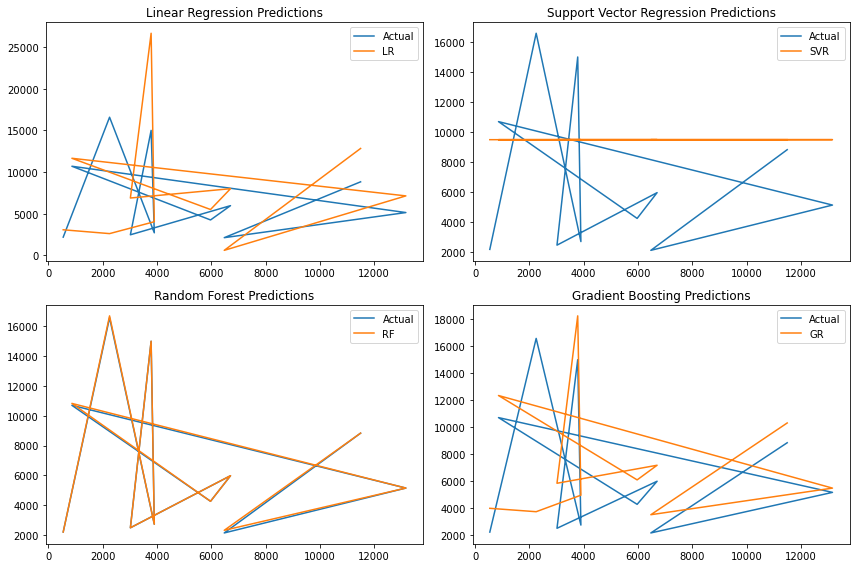

In [43]:

import matplotlib.pyplot as plt

# Create a figure and axes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Linear Regression Predictions
axs[0, 0].plot(df1['Actual'].iloc[0:11], label='Actual')
axs[0, 0].plot(df1['LR'].iloc[0:11], label="LR")
axs[0, 0].legend()
axs[0, 0].set_title('Linear Regression Predictions')

# Plot Support Vector Regression Predictions
axs[0, 1].plot(df1['Actual'].iloc[0:11], label='Actual')
axs[0, 1].plot(df1['SVR'].iloc[0:11], label="SVR")
axs[0, 1].legend()
axs[0, 1].set_title('Support Vector Regression Predictions')

# Plot Random Forest Predictions
axs[1, 0].plot(df1['Actual'].iloc[0:11], label='Actual')
axs[1, 0].plot(df1['RF'].iloc[0:11], label="RF")
axs[1, 0].legend()
axs[1, 0].set_title('Random Forest Predictions')

# Plot Gradient Boosting Predictions
axs[1, 1].plot(df1['Actual'].iloc[0:11], label='Actual')
axs[1, 1].plot(df1['GR'].iloc[0:11], label="GR")
axs[1, 1].legend()
axs[1, 1].set_title('Gradient Boosting Predictions')

# Adjust layout and display
plt.tight_layout()
plt.show()




In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics for each model
mae_lr = mean_absolute_error(y_test, y_pred1)
mse_lr = mean_squared_error(y_test, y_pred1)
r2_lr = r2_score(y_test, y_pred1)

mae_svr = mean_absolute_error(y_test, y_pred2)
mse_svr = mean_squared_error(y_test, y_pred2)
r2_svr = r2_score(y_test, y_pred2)

mae_rf = mean_absolute_error(y_test, y_pred3)
mse_rf = mean_squared_error(y_test, y_pred3)
r2_rf = r2_score(y_test, y_pred3)

mae_gr = mean_absolute_error(y_test, y_pred4)
mse_gr = mean_squared_error(y_test, y_pred4)
r2_gr = r2_score(y_test, y_pred4)

# Print the regression evaluation metrics for each model
print("Linear Regression:")
print("R2 Score:", r2_lr)
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("\nSupport Vector Regression:")
print("R2 Score:", r2_svr)
print("MAE:", mae_svr)
print("MSE:", mse_svr)
print("\nRandom Forest Regression:")
print("R2 Score:", r2_rf)
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("\nGradient Boosting Regression:")
print("R2 Score:", r2_gr)
print("MAE:", mae_gr)
print("MSE:", mse_gr)


Linear Regression:
R2 Score: 0.7436809715825925
MAE: 4130.163957125263
MSE: 38281282.88456022

Support Vector Regression:
R2 Score: -0.10592310792273119
MAE: 8385.477432611491
MSE: 165169771.45379543

Random Forest Regression:
R2 Score: 0.9684029387509301
MAE: 445.85413200000806
MSE: 4719025.534174019

Gradient Boosting Regression:
R2 Score: 0.8644959791760733
MAE: 2656.62254526224
MSE: 20237544.536524907


In [45]:
import pickle

model_file = 'random_forest_regressor_model.pkl'
with open(model_file, 'wb') as file:
    pickle.dump(rf, file)